# Deploying Custom Python Functions in Pandas

**Our real-world challenge:** We have several datasets (Census, SNAP, homeless shelters) that we need to merge together to glean insight. Our challenge is that the columns in common between all the datasets have slightly different data formatting. We have to standardize those values.

We will have to:
1. build a custom Python function, with conditional logic, to standardize our data,
2. apply that function across multiple columns,
3. merge our datasets 

In [2]:
## import library
import pandas as pd

## Import relevant data

In [4]:
## import census data and get sample of 15
dfcensus = pd.read_csv("https://raw.githubusercontent.com/sandeepmj/datasets/main/conditional-conversion/NYC_Census_2020_2010_geotype.csv")
dfcensus.head()

,Year,GeoType,Borough,Community District Number,Community District Name,Total Population,Average household size,Children,Latino,White non-Hispanic,Black non-Hispanic,Asian,Other race,Two or more races,Total housing units,Occupied housing units,Vacant housing units
0,2020,CD,Queens,407,Queens Community District 7,"269,587",2.75,"45,543","48,845","55,882","5,412","154,404","1,575","3,469","102,836","97,059","5,777"
1,2020,CD,Brooklyn,311,Brooklyn Community District 11,"198,870",2.94,"42,380","31,489","72,496","2,353","86,067","1,081","5,384","71,074","67,236","3,838"
2,2020,CD,Queens,404,Queens Community District 4,"181,025",3.24,"38,213","93,972","9,329","7,679","65,963","1,692","2,390","57,748","55,202","2,546"
3,2020,CD,Queens,408,Queens Community District 8,"161,402",2.76,"32,754","29,486","44,302","18,682","60,413","3,200","5,319","59,385","56,623","2,762"
4,2020,CD,Queens,411,Queens Community District 11,"122,211",2.69,"21,612","14,460","41,967","2,641","59,980",779,"2,384","47,357","45,204","2,153"


In [5]:
# get info
dfcensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       59 non-null     int64  
 1   GeoType                    59 non-null     object 
 2   Borough                    59 non-null     object 
 3   Community District Number  59 non-null     int64  
 4   Community District Name    59 non-null     object 
 5   Total Population           59 non-null     object 
 6   Average household size     59 non-null     float64
 7   Children                   59 non-null     object 
 8   Latino                     59 non-null     object 
 9   White non-Hispanic         59 non-null     object 
 10  Black non-Hispanic         59 non-null     object 
 11  Asian                      59 non-null     object 
 12  Other race                 59 non-null     object 
 13  Two or more races          59 non-null     object 
 

In [6]:
## import SNAP benefits and see sample of 15
dfsnap = pd.read_csv("https://raw.githubusercontent.com/sandeepmj/datasets/main/conditional-conversion/SNAP_benefits_borough.csv")
dfsnap

,Month,Boro,Community District,BC_SNAP_Recipients,BC_SNAP_Households
0,9/1/20,Manhattan,M01,2276,1799
1,9/1/20,Manhattan,M02,2994,2438
2,9/1/20,Manhattan,M03,37879,26041
3,9/1/20,Manhattan,M04,13035,9802
4,9/1/20,Manhattan,M05,6159,4317
...,...,...,...,...,...
1116,3/1/23,Queens,Q13,23430,14876
1117,3/1/23,Queens,Q14,31366,17378
1118,3/1/23,Staten Island,S01,41354,22254
1119,3/1/23,Staten Island,S02,18554,10695


In [7]:
## get info
dfsnap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               1121 non-null   object
 1   Boro                1121 non-null   object
 2   Community District  1121 non-null   object
 3   BC_SNAP_Recipients  1121 non-null   int64 
 4   BC_SNAP_Households  1121 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 43.9+ KB


In [8]:
## import homeless shelter data and get sample of 15
dfshelter = pd.read_csv("https://raw.githubusercontent.com/sandeepmj/datasets/main/conditional-conversion/HomelessShelterbyBorough.csv")
dfshelter

,Report Date,Borough,Community District,Census Type,Adult Family Commercial Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Commercial Hotel,Family Cluster,Family with Children Commercial Hotel,Family with Children Shelter
0,10/31/20,Bronx,1,Individuals,NaN,189.0,73.0,140.0,31.0,64.0,1202.0
1,10/31/20,Bronx,2,Individuals,NaN,160.0,0.0,NaN,204.0,NaN,866.0
2,10/31/20,Bronx,3,Individuals,NaN,258.0,218.0,123.0,62.0,115.0,1295.0
3,10/31/20,Bronx,4,Individuals,NaN,NaN,206.0,99.0,910.0,NaN,2134.0
4,10/31/20,Bronx,5,Individuals,NaN,203.0,0.0,NaN,755.0,NaN,1054.0
...,...,...,...,...,...,...,...,...,...,...,...
3181,3/31/23,Queens,13,Individuals,NaN,NaN,131.0,895.0,NaN,NaN,832.0
3182,3/31/23,Queens,14,Individuals,NaN,321.0,102.0,339.0,NaN,NaN,180.0
3183,3/31/23,Staten Island,1,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,135.0
3184,3/31/23,Staten Island,2,Individuals,NaN,NaN,NaN,NaN,NaN,546.0,NaN


In [9]:
## get info
dfshelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Report Date                            3186 non-null   object 
 1   Borough                                3186 non-null   object 
 2   Community District                     3186 non-null   int64  
 3   Census Type                            3186 non-null   object 
 4   Adult Family Commercial Hotel          80 non-null     float64
 5   Adult Family Shelter                   802 non-null    float64
 6   Adult Shelter                          1797 non-null   float64
 7   Adult Shelter Commercial Hotel         1242 non-null   float64
 8   Family Cluster                         402 non-null    float64
 9   Family with Children Commercial Hotel  886 non-null    float64
 10  Family with Children Shelter           2168 non-null   float64
dtypes: f

#### What are the differences and challenges?

## 1. Conditional Statements: decision-making based on conditions

> We want our code to flow based on inputs, calculations and other needs. Without flow control, a program would execute linearly without any logical progression.
>
### A Conditional Statements


<img src="https://sandeepmj.github.io/image-host/if-else.png" width="300">


In [12]:
## Write an expression that evaluates someone's age and decides 
## whether they can be served alcohol

age = 20
if age < 21:
    print("No booze for you!")
else:
    print("What will you have?")

No booze for you!


### More often than not, there are multiple conditions that have to be tested:
<img src="https://sandeepmj.github.io/image-host/if-elif-else.png" width="300">

<b>Create a credit rating expression based on the following values</b>

- 300-579: Poor
- 580-669: Fair
- 670-739: Good
- 740-799: Very good
- 800-850: Excellent

Your output should say "Your credit of (whatever) is (rating)!"

In [15]:
credit = -689

if credit <= 579:
    print(f"Your credit of {credit} is poor.")
elif 580 <= credit <= 669:
    print(f"Your credit of {credit} is fair.")
elif 670 <= credit <= 739:
    print(f"Your credit of {credit} is good.")
elif 740 <= credit <= 799:
    print(f"Your credit of {credit} is very good.")
else:
    print(f"Your credit of {credit} is excellent.") 

Your credit of -689 is poor.


## Tenary Expression
```variable = value1 if some_condition else value2```

In [17]:
## simple credit approved or not approved
age = 42
"What would you like to drink?" if age >= 21 else "No Booze for you"

'What would you like to drink?'

## Multiple Tenary Expression
```variable = (value1 if condition1 ```
              ```(else value2 if condition2```
              ```else value3) ```

In [19]:
credit = 580

("Not approved" if credit < 669
else "Excellent rate" if credit >= 750
else "You are approved")

'Not approved'

## Functions

The real power in any programming language is the **Function**.

A function is:

* a little block of script (one line or many) that performs specific task or a series of tasks.
* reusable and helps us make our code DRY.
* triggered when something "invokes" or "calls" it.
* ideally modular – it performs a narrow task and you call several functions to perform more complex tasks.

#### Build a function called myFunction that adds 2 numbers together
## it should print ```"The total is (whatever the number is)!"```

In [22]:
## built it here
def addNumbers(number1, number2):
    total = number1 + number2
    print(f"The total is {total}")

In [23]:
## Call the using 4 and 5 as the arguments
addNumbers(4, 5)

The total is 9


### A function with parameters

<img src="https://sandeepmj.github.io/image-host/function-parameters.png">

### Calling a function with arguments

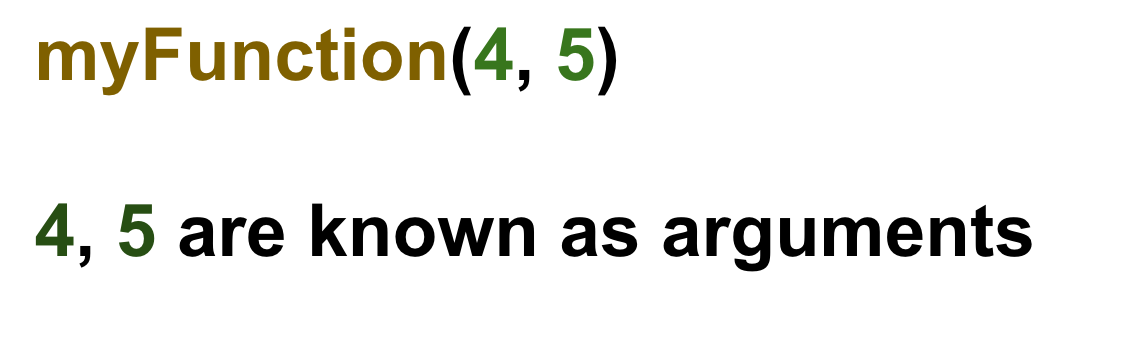

### Return Statements

So far we have only printed out values processed by a function.

But we really want to retain the value the function creates.

We can then pass that value to other parts of our calculations and code.

In [27]:
## let's save our previous function's result in a variable called Calc
addNumbers(6,4)

The total is 10


In [28]:
## Print myCalc. What does it hold?
print(some_value)

NameError: name 'some_value' is not defined

In [ ]:
## what type of data?
type(some_value)

### The return Statement

In [ ]:
## Tweak our function by adding return statement
## instead of printing a value we want to return a value(or values).

def addNumbers(number1, number2):
    total = number1 + number2
    print(f"The total is {total}")
    return total

In [ ]:
## call the function add_numbers_ret
## and store in variable called myCalc
my_calc = addNumbers(10, 20)

In [ ]:
## print myCalc
my_calc

In [ ]:
## What type is myCalc?
type(my_calc)

In [ ]:
## conditional credit check and put into function

def creditCheck(credit):
    
    if credit <= 579:
        print(f"Your credit of {credit} is poor.")
    elif 580 <= credit <= 669:
        print(f"Your credit of {credit} is fair.")
    elif 670 <= credit <= 739:
        print(f"Your credit of {credit} is good.")
    elif 740 <= credit <= 850:
        print(f"Your credit of {credit} is very good.")
    else:
        print(f"Your credit of {credit} is excellent.") 

In [ ]:
creditCheck(450)

In [ ]:
creditCheck(806)

### Lambda (or anonymous) Functions

* Lambda functions allow you to create a custom calculation.
* You can then apply this calculation to targeted columns in your Pandas dataframe.
* Lambda functions, also known as ```anonymous functions```, are considered quick, throwaway functions.

### Structure of a Lamba Function


 ```lambda arguments: expression```

 A real lambda function:

 ```lambda x: x * 2```

 Compared to:
 ```def times2(x):
    return x*2```

### Applying Lambdas to Pandas dataframes

* In Pandas, we ```apply()``` lambda expressions to columns.

Here we create a new column by multiplying existing values in each row of a column by 2.

```df['new_column'] = df['existing_column'].apply(lambda x: x * 2)```

In [ ]:
## create a df with mock data

data = {'firm': ['Bilk Inc.', 'Vine & Co.', 'Kiln Inc.', 'Y & Y Consulting', 'Trending Inc.', "State Insurance"],
   'net_2020': [1150, 2300, 3400, 1500, 6500, 1000 ],
        'net_2021': [1216, 2619, 3701, 1890, 5630, 1099 ]
           }
df = pd.DataFrame(data)

df

In [ ]:
## create a copy to test something
dfx = df.copy()
dfx

In [ ]:
## create a col 2022 which increases the col 2021 by 10 percent
dfx["net_2022"] = dfx["net_2021"].apply(lambda target_row: target_row *1.1)
dfx

### ```apply()``` v. ```vectorization```

In our previous example, our apply function is applied by looping row by row and applying it to each value. This can be highly inefficient.

In our next cell, we simply use ```vectorization``` and it does the entire column or row at one time. This is much more efficient.

In [ ]:
## vectorize
dfx["net_2022_vectorized"] = dfx["net_2021"] * 1.1
dfx

### When Should You Use .apply() Instead?
- When operations involve multiple columns and require complex logic.
- We can tap ```lambdas``` using values from specific columns for our calculations

```df['new_col'] = df.apply(lambda x: x['column1'] + x['column2'], axis = 1)```


In [ ]:
## Find the difference between net_2020 and net_2022
dfx["3-yr-diff"] = dfx.apply(lambda x: x["net_2022"] - x["net_2020"], axis = 1)
dfx

In [ ]:
## try it without axis = 1
## will break
dfx["3-yr-diff-2"] = dfx.apply(lambda x: x["net_2022"] - x["net_2020"], axis = 1)
dfx

## So what is ```axis = 1``` in Pandas?

Basically, the axis parameter determines whether the operation is applied to rows or columns:

<img src="https://raw.githubusercontent.com/sandeepmj/22spring-advanced-data/main/img/axis.png" width="75%">

In [ ]:
## Axis Summary
axis = pd.read_csv("https://raw.githubusercontent.com/sandeepmj/datasets/main/axis.csv")
axis

### What is the percentage change between net_2021 and net_2022 in dfx?¶


#### create a function that gets the percent change between two numbers
NAME YOUR FUNCTION: pct_chg

In [ ]:
## code function here


In [ ]:
## test it here


In [ ]:
## APPLY to your function


**What's happening** :

- The apply() function is being used with axis=1, meaning it operates row-wise.
- The ```lambda x:``` function processes each row of dfx, one at a time.
- The x represents a single row (not the entire DataFrame, just one row at a time).
- ```x['net_2022']``` and ```x['net_2021']``` extract values from the row.

In [ ]:
## mix in conditional to create new column that says loss or profit
df["net_2022"] = df["net_2021"] * 1.1
df

In [ ]:
df["category"] =\
df.apply(lambda x: "increase" if x["net_2022"] > x["net_2020"] else "decrease", axis = 1)

In [ ]:
df

## Back to our original goal of standardizing our three dataframes

In [ ]:
## remind us of census data
dfcensus.head()

In [ ]:
dfsnap.head(3)

In [ ]:
dfsnap.sample(20)

In [ ]:
dfshelter

In [ ]:
dfcensus.head(2)

In [ ]:
dfcensus.info()

### Function fo standardize census CDN




In [ ]:
## function to convert CDN for census data
def convertCensus(cdn):
    string_cdn = str(cdn)
    first_digit = string_cdn[0]
    # print(first_digit)
    last_2_digits = string_cdn[1:]
    # print(last_2_digits)
    if first_digit == "1":
        cdn_code = f"M{last_2_digits}"
    elif first_digit == "2":
        cdn_code = f"B{last_2_digits}"
    elif first_digit == "3":
        cdn_code = f"K{last_2_digits}"
    elif first_digit == "4":
        cdn_code = f"Q{last_2_digits}"
    elif first_digit == "5":
        cdn_code = f"S{last_2_digits}"
    else: cdn_code = "FLAG"
    return cdn_code
    

In [ ]:
convertCensus(407)

In [ ]:
dfcensus.head(3)

In [ ]:
## run it
dfcensus["updated_cdn"] = \
dfcensus["Community District Number"].apply(lambda x: convertCensus(x))
dfcensus

In [ ]:
## did it work?


In [ ]:
## let's move it closer to original CDN


In [ ]:
## reorder
list(dfcensus.columns)

In [ ]:
## call census data
dfcensus = dfcensus[['Year',
 'GeoType',
 'Borough',
    'updated_cdn',
 'Total Population',
 'Average household size',
 'Children',
 'Latino',
 'White non-Hispanic',
 'Black non-Hispanic',
 'Asian',
 'Other race',
 'Two or more races',
 'Total housing units',
 'Occupied housing units',
 'Vacant housing units',
 ]]

In [ ]:
dfcensus

## Homework
### Standardize shelter data

In [41]:
## recall dfshelter
dfshelter.sample(20)

,Report Date,Borough,Community District,Census Type,Adult Family Commercial Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Commercial Hotel,Family Cluster,Family with Children Commercial Hotel,Family with Children Shelter
808,10/31/21,Manhattan,10,Individuals,NaN,NaN,576.0,NaN,NaN,NaN,537.0
2781,9/30/22,Bronx,9,Individuals,NaN,NaN,262.0,NaN,NaN,128.0,1191.0
2312,3/31/20,Bronx,11,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3074,2/28/23,Bronx,7,Individuals,NaN,NaN,613.0,NaN,NaN,105.0,452.0
1910,8/31/19,Brooklyn,10,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,1/31/19,Queens,1,Individuals,NaN,NaN,199.0,NaN,NaN,268.0,393.0
2881,10/31/22,Queens,8,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,299.0
2967,12/31/22,Brooklyn,6,Individuals,NaN,99.0,263.0,279.0,NaN,NaN,565.0
1360,8/31/18,Bronx,4,Individuals,NaN,NaN,431.0,74.0,1601.0,NaN,1947.0
2810,9/30/22,Manhattan,8,Individuals,NaN,NaN,38.0,NaN,NaN,NaN,NaN


In [43]:
## function to convert shelter CDN
def convertShelter(boro,cdn):
  if boro == "Bronx":
    letter = "B"
  elif boro == "Queens":
    letter = "Q"
  elif boro == "Staten Island":
    letter = "S"
  elif boro == "Manhattan":
    letter = "M"
  elif boro == "Brooklyn":
    letter = "K"
  else: return "FLAG"
  if len(str(cdn)) <= 1:
    code = f"0{cdn}"
  else: code = cdn
  return f"{letter}{code}"

In [45]:
## test it 
convertShelter("Queens", 1)

'Q01'

In [47]:
convertShelter("Brooklyn", 20)

'K20'

In [49]:
## use on shelter data 
dfshelter["updated_cdn"] = \
dfshelter.apply(lambda x: convertShelter(x["Borough"], x["Community District"]), axis = 1)

In [51]:
## verify
dfshelter.head()

,Report Date,Borough,Community District,Census Type,Adult Family Commercial Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Commercial Hotel,Family Cluster,Family with Children Commercial Hotel,Family with Children Shelter,updated_cdn
0,10/31/20,Bronx,1,Individuals,NaN,189.0,73.0,140.0,31.0,64.0,1202.0,B01
1,10/31/20,Bronx,2,Individuals,NaN,160.0,0.0,NaN,204.0,NaN,866.0,B02
2,10/31/20,Bronx,3,Individuals,NaN,258.0,218.0,123.0,62.0,115.0,1295.0,B03
3,10/31/20,Bronx,4,Individuals,NaN,NaN,206.0,99.0,910.0,NaN,2134.0,B04
4,10/31/20,Bronx,5,Individuals,NaN,203.0,0.0,NaN,755.0,NaN,1054.0,B05


In [53]:
## verifying staten island
dfshelter.query("Borough == 'Staten Island'").head(3)

,Report Date,Borough,Community District,Census Type,Adult Family Commercial Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Commercial Hotel,Family Cluster,Family with Children Commercial Hotel,Family with Children Shelter,updated_cdn
56,10/31/20,Staten Island,1,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,94.0,S01
57,10/31/20,Staten Island,2,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S02
58,10/31/20,Staten Island,3,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S03


In [55]:
## verifying brooklyn
dfshelter.query("Borough == 'Brooklyn'").head(3)

,Report Date,Borough,Community District,Census Type,Adult Family Commercial Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Commercial Hotel,Family Cluster,Family with Children Commercial Hotel,Family with Children Shelter,updated_cdn
12,10/31/20,Brooklyn,1,Individuals,NaN,145.0,330.0,227.0,NaN,101.0,NaN,K01
13,10/31/20,Brooklyn,2,Individuals,NaN,78.0,96.0,296.0,NaN,NaN,68.0,K02
14,10/31/20,Brooklyn,3,Individuals,NaN,NaN,31.0,100.0,69.0,235.0,487.0,K03


#### Reorder columns

In [57]:
## call columns into list
list(dfshelter.columns)

['Report Date',
 'Borough',
 'Community District',
 'Census Type',
 'Adult Family Commercial Hotel',
 'Adult Family Shelter',
 'Adult Shelter',
 'Adult Shelter Commercial Hotel',
 'Family Cluster',
 'Family with Children Commercial Hotel',
 'Family with Children Shelter',
 'updated_cdn']

In [59]:
## redorder and call
dfshelter  = dfshelter[['Report Date',
 'Borough',
 'Community District',
 'updated_cdn',
 'Census Type',
 'Adult Family Commercial Hotel',
 'Adult Family Shelter',
 'Adult Shelter',
 'Adult Shelter Commercial Hotel',
 'Family Cluster',
 'Family with Children Commercial Hotel',
 'Family with Children Shelter']]

dfshelter.sample(10)

,Report Date,Borough,Community District,updated_cdn,Census Type,Adult Family Commercial Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Commercial Hotel,Family Cluster,Family with Children Commercial Hotel,Family with Children Shelter
139,12/31/20,Brooklyn,10,K10,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3114,2/28/23,Queens,5,Q05,Individuals,NaN,NaN,191.0,NaN,NaN,NaN,283.0
2923,11/30/22,Manhattan,3,M03,Individuals,NaN,NaN,501.0,235.0,NaN,NaN,328.0
1888,6/30/19,Staten Island,3,S03,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2359,3/31/20,Staten Island,2,S02,Individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,7/31/21,Brooklyn,5,K05,Individuals,NaN,NaN,563.0,323.0,NaN,57.0,359.0
2936,11/30/22,Queens,4,Q04,Individuals,NaN,NaN,NaN,245.0,NaN,NaN,537.0
2860,10/31/22,Brooklyn,17,K17,Individuals,NaN,NaN,NaN,NaN,NaN,172.0,1137.0
888,2/28/22,Bronx,4,B04,Individuals,NaN,NaN,346.0,NaN,NaN,NaN,2111.0
442,4/30/21,Brooklyn,13,K13,Individuals,NaN,NaN,NaN,65.0,NaN,NaN,10.0


## WILL DO IN CLASS next week Merge dataframes

In [ ]:
#call a few rows of census


In [ ]:
#call a few rows of snap


In [ ]:
## merge 2 at a time


In [ ]:
## Homework 
## merge shelter into previous dataframe

In [ ]:
## call shelter data


In [ ]:
## instead of 2 at a time, we do in one go:
df = dfcensus.merge(dfsnap, on = "updated_cdn").merge(dfshelter, on = "updated_cdn")
df

In [ ]:
df.info()